In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
path = "https://github.com/Sankalp-Sri/Retention-Study-of-Employees/raw/master/hr_data.csv"

In [3]:
#importing the first part of the dataset
df_1 = pd.read_csv(path)
df_1.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
#importing the second part of the dataset
df_2 = pd.read_csv(filepath_or_buffer="https://github.com/Sankalp-Sri/Retention-Study-of-Employees/raw/master/employee_satisfaction_evaluation.csv")
df_2.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


Now we can see that this data set contains one common field i.e. employee i.d. and two new fields which are satisfaction level & last evaluation scores

We will be merging the two datasets using the comman field i.e. employee id

In [5]:
df_main = df_1.set_index('employee_id').join(df_2.set_index("EMPLOYEE #"))
df_main.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [0]:
df_main.reset_index(inplace=True)

In [7]:
df_main.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


# Data Cleaning

Missing Value Analysis

In [8]:
df_main.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [9]:
df_main.iloc[:,9:11].describe()

,satisfaction_level,last_evaluation
count,14972.000000,14972.000000
mean,0.612830,0.716125
std,0.248714,0.171138
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


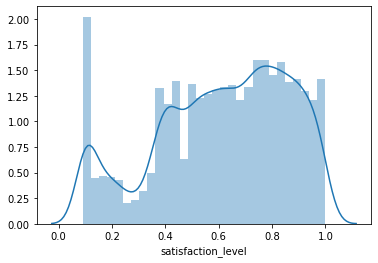

In [10]:
#See the distribution of Satisfaction level & Last evaluation features for adapting the better methodology for imputation
sns.distplot(df_main['satisfaction_level'])

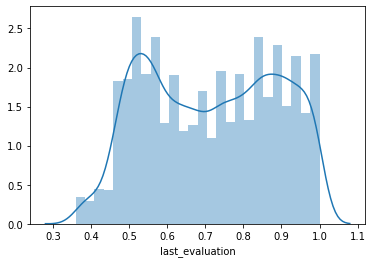

In [11]:
sns.distplot(df_main['last_evaluation'])

As it can be seen that the distribution of both is not look like a Normal Distribution.
Now lookig at the description of both the feature we can replace the missing value by the mean

In [0]:
df_main.fillna(df_main.mean(),inplace=True)

In [18]:
df_main.isna().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

Outlier Analysis

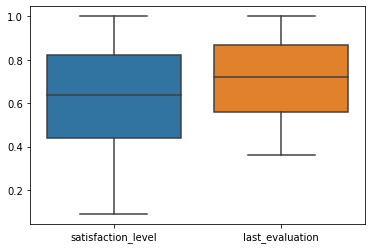

In [19]:
fig,ax = plt.subplots(figsize = (6,4))
sns.boxplot(data = df_main[['satisfaction_level','last_evaluation']])

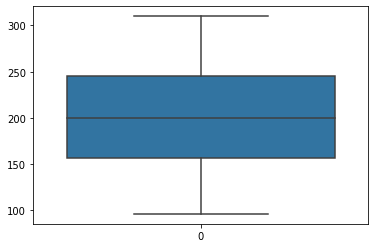

In [20]:
sns.boxplot(data =df_main['average_montly_hours'])

It can be seen that none of the continuous variables are having any outlier values.

### **EDA**

In [21]:
df_main.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.61283,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.24849,0.170984
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.09000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.44000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.64000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.82000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Dropping the employee id variable which is representing sample index

In [0]:
df_main.drop(labels='employee_id',axis=1,inplace=True)

#Bi-Variate Analysis

###1. Employee_left vs Time Spend in Company

In [23]:
tab_time = pd.crosstab(df_main['left'],df_main['time_spend_company'])
tab_time

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
0,3191,4857,1667,640,509,188,162,214
1,53,1586,890,833,209,0,0,0


Following points can be drawn:

1. Employee who work upto 2,3,4,5,6 years are having different trends to leave the company
2. Employee who work for 7,8,10 years are very less likely to leave the company

Let's now create a cluster of the employees based on time spend in company

In [0]:
X_clstr1 =df_main[['time_spend_company','left']].values

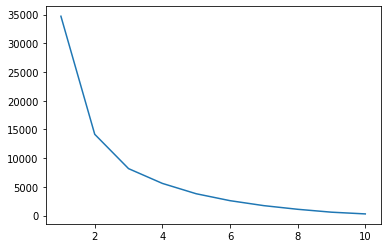

In [25]:
#importing the KMeans library
from sklearn.cluster import KMeans

#Find the best number of cluster for our features with ELBOW method:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X_clstr1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [0]:
#So we will go with the 3 clusters based on elbow method

#Now run the Kmeans on our dataset feature and see the clusters
kmeans = KMeans(n_clusters=3, random_state=0,n_init=20,max_iter=1000)
y_means = kmeans.fit_predict(df_main[['time_spend_company','left']].values)

<function matplotlib.pyplot.show>

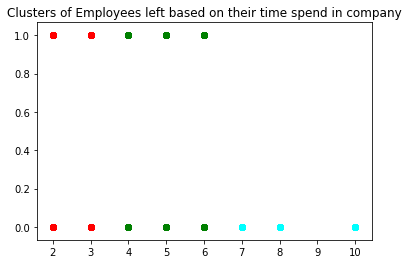

In [27]:
#Plot the cluseters
plt.scatter(X_clstr1[y_means==0,0],X_clstr1[y_means == 0, 1],c = "red")
plt.scatter(X_clstr1[y_means==1,0],X_clstr1[y_means == 1, 1],c = "green")
plt.scatter(X_clstr1[y_means==2,0],X_clstr1[y_means == 2, 1],c = "cyan")
plt.title("Clusters of Employees left based on their time spend in company")
plt.show

In [30]:
#Let's check the dependency between the two features with chi2 test
#H0 : Both the variables are independent of each other in the given sample
#H1 : Both the variables are not independent of each other in the given sample
from scipy.stats import chi2_contingency
chi2_contingency(tab_time)

(2110.079505335631,
 0.0,
 7,
 array([[2471.66024402, 4909.03420228, 1948.2229482 , 1122.30442029,
          547.05673712,  143.2404827 ,  123.43062871,  163.05033669],
        [ 772.33975598, 1533.96579772,  608.7770518 ,  350.69557971,
          170.94326288,   44.7595173 ,   38.56937129,   50.94966331]]))

In [0]:
#Based on the ablove cluster plot we can reduce the levels of our "time_spend_company" variable by categorizing them based on clusters they belong
time_spend_map = {2:'2+',3:'2+',4:'4+',5:'4+',6:'4+',7:'6+',8:'6+',10:'6+'}
#time_spend_map = {2:'2',3:'3+',4:'3+',5:'5+',6:'5+',7:'5+',8:'8+',10:'8+'}
df_main['time_spend_company'] = df_main['time_spend_company'].map(time_spend_map)

In [32]:
tab_time = pd.crosstab(df_main['left'],df_main['time_spend_company'])
tab_time

time_spend_company,2+,4+,6+
left,,,
0,8048,2816,564
1,1639,1932,0


In [33]:
chi2_contingency(tab_time)

(1175.6708693140247,
 5.085275207458095e-256,
 2,
 array([[7380.6944463 , 3617.58410561,  429.7214481 ],
        [2306.3055537 , 1130.41589439,  134.2785519 ]]))

as p-val is less than 0.05 we may reject the null hypothesis and conclude that the time_spend and employee left are indeed dependent on each other & we have successfully reduce the levels of our time_spend variable which eventually will lead to reduction in dimension after dummy encoding. Thus prevents the Curse of Dimentionality

### 2. Employee_left vs Number of project they have done

In [34]:
tab_proj = pd.crosstab(df_main['left'],df_main['number_project'])
tab_proj

number_project,2,3,4,5,6,7
left,,,,,,
0,821,3983,3956,2149,519,0
1,1567,72,409,612,655,256


In [35]:
chi2_contingency(tab_proj)

(5373.586480049045,
 0.0,
 5,
 array([[1819.45889726, 3089.57530502, 3325.76971798, 2103.65411027,
          894.49109941,  195.05087006],
        [ 568.54110274,  965.42469498, 1039.23028202,  657.34588973,
          279.50890059,   60.94912994]]))

Clustering of employee left based on number of project



In [0]:
X_clstr2 =df_main[['number_project','left']].values

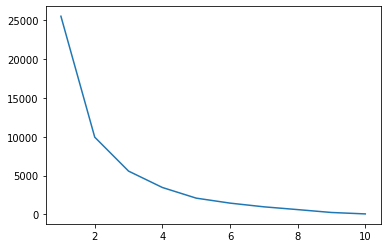

In [37]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(X_clstr2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [0]:
#So we will go with the 3 clusters based on elbow method

#Now run the Kmeans on our dataset feature and see the clusters
kmeans = KMeans(n_clusters=3, random_state=0,n_init=10,max_iter=1000)
y_means = kmeans.fit_predict(X_clstr2)

<function matplotlib.pyplot.show>

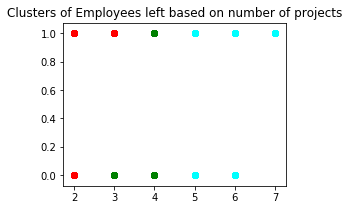

In [39]:
#Plot the clusters
plt.figure(figsize=(4,3))
plt.scatter(X_clstr2[y_means==0,0],X_clstr2[y_means == 0, 1],c = "red")
plt.scatter(X_clstr2[y_means==1,0],X_clstr2[y_means == 1, 1],c = "green")
plt.scatter(X_clstr2[y_means==2,0],X_clstr2[y_means == 2, 1],c = "cyan")
#plt.scatter(X_clstr1[y_means==3,0],X_clstr1[y_means == 3, 1],c = "pink")
plt.title("Clusters of Employees left based on number of projects")
plt.show

In [0]:
#Let's label the levels of number_project based on clusters
num_proj_map = {2:'2',3:'3',4:'4',5:'5+',6:'5+',7:'5+'}
df_main['number_project'] = df_main['number_project'].map(num_proj_map)

In [42]:
chi2_contingency(tab_proj)

(4250.984860716708,
 0.0,
 3,
 array([[1819.45889726, 3089.57530502, 3325.76971798, 3193.19607974],
        [ 568.54110274,  965.42469498, 1039.23028202,  997.80392026]]))

The test suggests that the number of project done and employees left are not independent and there is some dependency between these features.
So we will be keeping this variable for our model

### 3. Employee_left vs Department they belong

In [43]:
grp_dept  = df_main.groupby(by = df_main['department'])
grp_dept.mean()

,average_montly_hours,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,
IT,202.215974,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,200.800508,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,201.162973,0.125163,0.265971,0.018253,0.582377,0.718000
hr,198.684709,0.120433,0.290934,0.020298,0.598830,0.709075
management,201.249206,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,199.385781,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,199.965632,0.146341,0.219512,0.000000,0.619951,0.714703
sales,200.911353,0.141787,0.244928,0.024155,0.614440,0.709719
support,200.758188,0.154778,0.248991,0.008973,0.618173,0.722985


By looking at the distribution of variables in the above table we can say that for various department the mean values of the various features has very low variance.
Thus it can be said that department variable doesn't really contribute in infering that which employee will left or stay 

In [44]:
#Let's cross check this conclusion by doing the chi2 test
tab_dept = pd.crosstab(df_main['left'],df_main['department'])
tab_dept

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,
0,954,666,563,524,539,655,704,3126,1674,2023
1,273,121,204,215,91,203,198,1014,555,697


In [45]:
chi2_contingency(tab_dept)

(86.82547426790298,
 7.042130463822568e-15,
 9,
 array([[ 934.87272485,  599.62904194,  584.39069271,  563.0570038 ,
          480.00800053,  653.72518168,  687.24954997, 3154.33828922,
         1698.31402093, 2072.41549437],
        [ 292.12727515,  187.37095806,  182.60930729,  175.9429962 ,
          149.99199947,  204.27481832,  214.75045003,  985.66171078,
          530.68597907,  647.58450563]]))

As it can be seen that chi square test also suggesting that the feature department has very less impact on employees left tendency as the expected value & observed value in contingency tables is some what similar. So we would be dropping this variable from our dataset

In [0]:
df_main.drop(labels='department',axis=1,inplace=True)

### 4.Employee_Left Vs Promotion

In [47]:
tab_prom = pd.crosstab(df_main['promotion_last_5years'],df_main['left'])
tab_prom

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [48]:
chi2_contingency(tab_prom)

(56.26162726484021,
 6.344155457918697e-14,
 1,
 array([[11184.94832989,  3495.05167011],
        [  243.05167011,    75.94832989]]))

Two things can be drawn from above table:
1. Very less people were got promoted in last 5 years
2. Those who got promoted are less prone to leave as promotion seems to dependent on employees leaving tendency as p-val <<< 0.05

### 5.Employee left vs Salary slab

In [49]:
tab_sal = pd.crosstab(df_main['salary'],df_main['left'])
tab_sal

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


As expected high salaried employee tends to leave less as compared to the low salaried employees Let's check the statistical significance of the fact with the help of chi2 test

In [50]:
chi2_contingency(tab_sal)

(381.22504706621066,
 1.652086749295958e-83,
 2,
 array([[ 942.49189946,  294.50810054],
        [5574.18814588, 1741.81185412],
        [4911.31995466, 1534.68004534]]))

As we can see p-val << 0.05 we would reject the null hypothesis and conclude that salary slab is not independent of employee_left 

### 6. Employee left vs Work Accident

In [51]:
tab_acc = pd.crosstab(df_main['left'],df_main['Work_accident'])
tab_acc

Work_accident,0,1
left,,
0,9428,2000
1,3402,169


In [52]:
chi2_contingency(tab_acc)

(357.5623604097228,
 9.55823958002199e-80,
 1,
 array([[9775.40102674, 1652.59897326],
        [3054.59897326,  516.40102674]]))

It can be seen that work accident doesn't affect the employee leaving tendency much

### 7.Employee Left & Average Monthly Working Hours

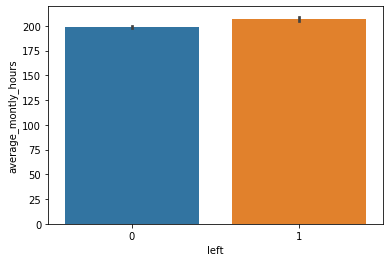

In [55]:
sns.barplot(x=df_main['left'],y=df_main['average_montly_hours'])

It can be seen that there is not much difference between the average_monthly_hours put for employees who have left and who didn't

### **Feature** **Engineering**

Normalize the Average monthly hours as it has higher scale units as compared to the other continuous variable

In [56]:
df_main['average_montly_hours'] = (df_main['average_montly_hours'].max()-df_main['average_montly_hours'])/(df_main['average_montly_hours'].max()-df_main['average_montly_hours'].min())
df_main.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation
0,2,0.714953,2+,0,1,0,low,0.38,0.53
1,5+,0.224299,4+,0,1,0,medium,0.80,0.86
2,5+,0.177570,4+,0,1,0,medium,0.11,0.88
3,5+,0.406542,4+,0,1,0,low,0.72,0.87
4,2,0.705607,2+,0,1,0,low,0.37,0.52


In [57]:
cat_var = df_main[['promotion_last_5years','number_project','Work_accident','time_spend_company','salary']]
cat_var.head()

,promotion_last_5years,number_project,Work_accident,time_spend_company,salary
0,0,2,0,2+,low
1,0,5+,0,4+,medium
2,0,5+,0,4+,medium
3,0,5+,0,4+,low
4,0,2,0,2+,low


In [58]:
num_var = df_main[['average_montly_hours','satisfaction_level','last_evaluation']]
num_var.head()
                  

,average_montly_hours,satisfaction_level,last_evaluation
0,0.714953,0.38,0.53
1,0.224299,0.80,0.86
2,0.177570,0.11,0.88
3,0.406542,0.72,0.87
4,0.705607,0.37,0.52


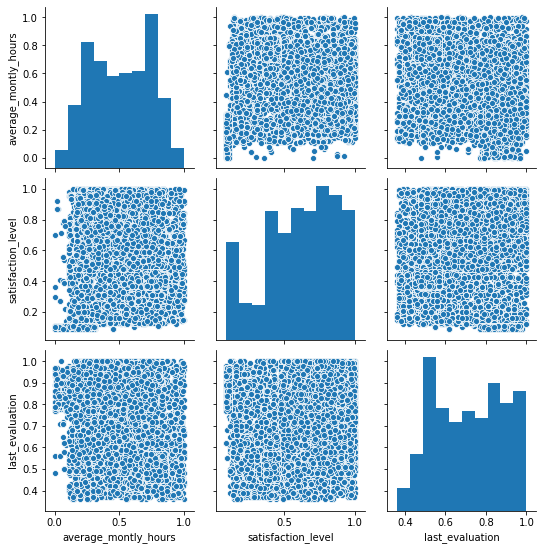

In [97]:
sns.pairplot(num_var)

It can be seen from the plots that there are no such established relationships between our continuous variables thus they must have a low correlation among them.
Let's check the same with the help of a heat map

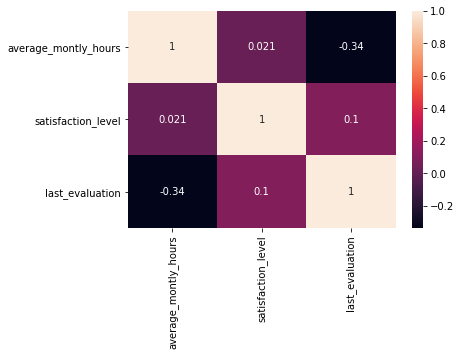

In [59]:
sns.heatmap(num_var.corr(),annot = True)

It can be seen that none of the numeric variables are strongly correlated with each other

### **Feature** **Encoding**

In [60]:
time_spend = pd.get_dummies(df_main['time_spend_company'],drop_first = True,prefix= "time_yr")
time_spend.head()

,time_yr_4+,time_yr_6+
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0


In [61]:
sal = pd.get_dummies(df_main['salary'],drop_first=True,prefix="sal")
sal.head()

,sal_low,sal_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [62]:
proj = pd.get_dummies(df_main['number_project'],drop_first=True, prefix= "Proj")
proj.head()

,Proj_3,Proj_4,Proj_5+
0,0,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,0


Concatinating all the encoded categorical variables

In [63]:
df_main = pd.concat(objs = (df_main,sal,proj,time_spend),axis=1)
df_main.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,satisfaction_level,last_evaluation,sal_low,sal_medium,Proj_3,Proj_4,Proj_5+,time_yr_4+,time_yr_6+
0,2,0.714953,2+,0,1,0,low,0.38,0.53,1,0,0,0,0,0,0
1,5+,0.224299,4+,0,1,0,medium,0.80,0.86,0,1,0,0,1,1,0
2,5+,0.177570,4+,0,1,0,medium,0.11,0.88,0,1,0,0,1,1,0
3,5+,0.406542,4+,0,1,0,low,0.72,0.87,1,0,0,0,1,1,0
4,2,0.705607,2+,0,1,0,low,0.37,0.52,1,0,0,0,0,0,0


In [64]:
df_main.drop(labels=['time_spend_company','number_project','salary'],axis=1,inplace=True)
df_main.head()

,average_montly_hours,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,sal_low,sal_medium,Proj_3,Proj_4,Proj_5+,time_yr_4+,time_yr_6+
0,0.714953,0,1,0,0.38,0.53,1,0,0,0,0,0,0
1,0.224299,0,1,0,0.80,0.86,0,1,0,0,1,1,0
2,0.177570,0,1,0,0.11,0.88,0,1,0,0,1,1,0
3,0.406542,0,1,0,0.72,0.87,1,0,0,0,1,1,0
4,0.705607,0,1,0,0.37,0.52,1,0,0,0,0,0,0


## **Feature_Selection**

In [0]:
#Before Applying Feature Selection we must split the data into train and test set to avoid "DATA LEAKAGE"
from sklearn.model_selection import train_test_split

In [66]:
#Splitting the dataset into train and test set to evaluate our model performance
X_train,X_test,y_train,y_test = train_test_split(df_main.drop(labels='left',axis=1),df_main['left'],test_size = 0.25,random_state=29)
X_train.shape,X_test.shape

((11249, 12), (3750, 12))

In [0]:
# We will be using Random Forest Algorithm to see the feature importance for our dataset
from sklearn.ensemble import RandomForestClassifier

In [0]:
#create an object rf_sel of Random Forest Classifier class for estimating feature importance
rf_sel = RandomForestClassifier(n_estimators=500)

In [69]:
rf_sel.fit(X_train,y_train)
feature_importance = pd.DataFrame(data=[X_train.columns,rf_sel.feature_importances_]).T
feature_importance = feature_importance.rename(columns= {0:'features',1:"feat_imp"})
feature_importance.sort_values(by= 'feat_imp',axis=0,ascending=False,inplace=True)
feature_importance


,features,feat_imp
3,satisfaction_level,0.362848
0,average_montly_hours,0.198036
4,last_evaluation,0.164207
10,time_yr_4+,0.103026
7,Proj_3,0.065223
8,Proj_4,0.0423861
9,Proj_5+,0.0397714
1,Work_accident,0.00841713
5,sal_low,0.00755039
6,sal_medium,0.0040787


Text(0.5, 1.0, 'Feature Importance Plot')

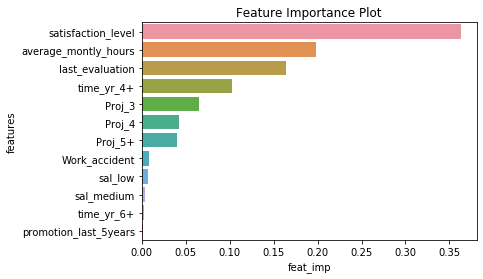

In [71]:
sns.barplot(feature_importance['feat_imp'],feature_importance['features'])
plt.title("Feature Importance Plot")

By Looking at the plot it can be seen that the variable Satisfaction_level has the highest importance among all variables followed by average_monthly_hours & Last_evaluation etc. So we will be keeping all the 12 variables as our predictors and see how the model performs with these features

### ***Modelling***

As the relationship between independent & dependent variable is not seems to be linear so we will be usig tree based methods to create our model for this problem statement


In [0]:
#Let's create a function to evaluate our model based on important performance metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
def perf_metrics(y_true,y_pred):
  cm = confusion_matrix(y_true,y_pred)
  clf = classification_report(y_true,y_pred)
  print(cm)
  print(clf)
  print( "ROC-AUC Score", roc_auc_score(y_true,y_pred) )

1. Random Forest Algorithm

In [0]:
rf_model = RandomForestClassifier(n_estimators=500,random_state=0) #I'll be using the basic hyperparameter settings to model this problem

In [74]:
%%time
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

CPU times: user 3.33 s, sys: 37.2 ms, total: 3.37 s
Wall time: 3.38 s


In [75]:
perf_metrics(y_test,y_pred_rf)

[[2863   17]
 [  39  831]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2880
           1       0.98      0.96      0.97       870

    accuracy                           0.99      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.99      0.99      0.98      3750

ROC-AUC Score 0.9746348180076628


The random forest model gives us an accuracy of 99% and the recall & roc_auc score of 96% & 97% respectively on the test data set which is pretty good.

In [0]:
#Lets do the cross validation to get an idea that how well my model will perform on the unseen data
from sklearn.model_selection import cross_val_score,cross_validate
scoring = ['accuracy','recall','roc_auc']

In [94]:
#Let us cross evaluating our model based on scoring parameter which is "Accuracy,recall & roc_auc" in our case and see the mean cross validation score it provides
print(cross_validate(rf_model,X_train,y_train,scoring = scoring,cv=10))

{'fit_time': array([2.92110682, 2.8594799 , 2.88121867, 2.85946918, 2.87661099,
       2.88098979, 2.88131571, 2.85420179, 2.8906424 , 2.87773681]), 'score_time': array([0.20454764, 0.20153499, 0.20327759, 0.20879364, 0.21073747,
       0.20448565, 0.21776581, 0.2013464 , 0.20200992, 0.21577406]), 'test_accuracy': array([0.98933333, 0.98311111, 0.98577778, 0.98222222, 0.99111111,
       0.98755556, 0.98933333, 0.97866667, 0.98844444, 0.99021352]), 'test_recall': array([0.96296296, 0.95555556, 0.95185185, 0.95555556, 0.98148148,
       0.97407407, 0.95925926, 0.93333333, 0.9704797 , 0.97407407]), 'test_roc_auc': array([0.99711284, 0.98830409, 0.99179554, 0.98842972, 0.99329002,
       0.99530431, 0.9916331 , 0.98449643, 0.99619978, 0.99442927])}


The cross validation also indicate that our model is predicting quite well on the unseen observations as well.

2. Extreem Gradient Boosting Algorithm (XGBOOST)

In [78]:
%%time
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=500,learning_rate=0.05,random_state=0)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

CPU times: user 2.08 s, sys: 116 ms, total: 2.2 s
Wall time: 2.93 s


In [79]:
perf_metrics(y_test,y_pred_xgb)

[[2841   39]
 [  67  803]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2880
           1       0.95      0.92      0.94       870

    accuracy                           0.97      3750
   macro avg       0.97      0.95      0.96      3750
weighted avg       0.97      0.97      0.97      3750

ROC-AUC Score 0.9547234195402299


It can be see that XGBoost Classifier is giving us an accuracy of 97% and recall & roc_auc Score of 92% & 95% respectively. Which is also pretty good but not better than the Random forest model

In [96]:
print(cross_validate(xgb,X_train,y_train,scoring=scoring,cv=10))

{'fit_time': array([1.78928113, 1.74909449, 1.73360658, 1.73774433, 1.76607585,
       1.74326086, 1.74347329, 1.75247502, 1.73844314, 1.72579646]), 'score_time': array([0.04208541, 0.04189706, 0.04070663, 0.03999281, 0.03895378,
       0.04141498, 0.0425818 , 0.03967595, 0.03924894, 0.04347849]), 'test_accuracy': array([0.97244444, 0.97155556, 0.96177778, 0.96444444, 0.97688889,
       0.96622222, 0.968     , 0.96177778, 0.96977778, 0.95907473]), 'test_recall': array([0.92222222, 0.92222222, 0.9       , 0.91111111, 0.95555556,
       0.92222222, 0.88888889, 0.88148148, 0.91881919, 0.92592593]), 'test_roc_auc': array([0.99167858, 0.98548625, 0.98484297, 0.98282434, 0.99257093,
       0.98962313, 0.98449209, 0.98221139, 0.99232179, 0.98603955])}


The cross validation scores against various metrics for the XGB Classifier which is awesome but still not better than what we have obtained from Random Forest Algo.

### **Deep Learning**

Lets create a simple Artificial Neural Network and see weather it can do better than the Random Forest Classifier

In [81]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [0]:
model = Sequential()
model.add(Dense(6, kernel_initializer="uniform",activation="relu",input_dim = 12))
model.add(Dense(4, kernel_initializer="uniform",activation="relu"))
model.add(Dense(1,kernel_initializer= "uniform",activation= "sigmoid"))

model.compile(optimizer="adam",loss= "binary_crossentropy",metrics= ['Recall'])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 78        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [86]:
batch_size = 50
epochs = 20

history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1,validation_data= (X_test,y_test))

score = model.evaluate(X_test,y_test,verbose=0)
print("total_loss", score[0])
print("total_accuracy", score[1])

Train on 11249 samples, validate on 3750 samples
Epoch 1/20
11249/11249 [==============================] - 1s 84us/sample - loss: 0.2057 - Recall: 0.8949 - val_loss: 0.1966 - val_Recall: 0.9011
Epoch 2/20
11249/11249 [==============================] - 1s 74us/sample - loss: 0.2052 - Recall: 0.8971 - val_loss: 0.1963 - val_Recall: 0.9092
Epoch 3/20
11249/11249 [==============================] - 1s 78us/sample - loss: 0.2050 - Recall: 0.9000 - val_loss: 0.1963 - val_Recall: 0.9000
Epoch 4/20
11249/11249 [==============================] - 1s 76us/sample - loss: 0.2047 - Recall: 0.8978 - val_loss: 0.1963 - val_Recall: 0.9103
Epoch 5/20
11249/11249 [==============================] - 1s 73us/sample - loss: 0.2045 - Recall: 0.8978 - val_loss: 0.1962 - val_Recall: 0.9000
Epoch 6/20
11249/11249 [==============================] - 1s 74us/sample - loss: 0.2044 - Recall: 0.8986 - val_loss: 0.1955 - val_Recall: 0.8977
Epoch 7/20
11249/11249 [==============================] - 1s 73us/sample - loss: 

**Random Forest Performed Better than the Deep Learning & XGB Classifier Models and gives us an Accuracy of 99% & a recall Value of 96% & all n all saves a lot of time**